In [18]:
# Based on https://github.com/probml/pmtk3/blob/master/demos/NIXdemo2.m
# Converted by John Fearns - jdf22@infradead.org
# Compare some Normal Inverse Chi Squared Distributions

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import invgamma
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

In [3]:
# Parameters for NIX(mu, kappa, nu, Sigma)
mu_0 = np.array([0, 0])
kappa_0 = np.array([1, 5])
nu_0 = np.array([1, 1])
# Sigma (uppercase) is lowercase sigma^2.
Sigma_0 = np.array([1, 1])


def scaled_inverse_chi_squared_pdf(x, dof, scale):
    # The scaled inverse Chi-squared distribution with the provided params
    # is equal to an inverse-gamma distribution with the following parameters:
    ig_shape = dof / 2
    ig_scale = dof * scale / 2
    return invgamma.pdf(x, ig_shape, loc=0, scale=ig_scale)

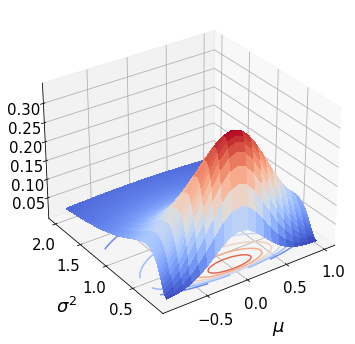

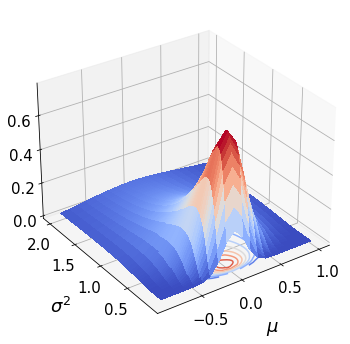

In [21]:
# Plot each distribution
for i in range(len(mu_0)):
    # Number of plotting points on each axis
    n_mu = 20
    n_Sigma = 100

    # Plotting points
    mu = np.linspace(-0.9, 1, n_mu)
    Sigma = np.linspace(0.1, 2, n_Sigma)
    mus, Sigmas = np.meshgrid(mu, Sigma)

    # NIX values
    invchi = scaled_inverse_chi_squared_pdf(Sigmas, nu_0[i], Sigma_0[i])
    normal = norm.pdf(mus, loc=mu_0[i], scale=np.sqrt(Sigmas / kappa_0[i]))
    # Careful to element-wise multiply
    nix = np.multiply(normal, invchi)

    figure = plt.figure(figsize=(6, 6))
    ax = figure.add_subplot(111, projection="3d")
    ax.view_init(30, -125)
    ax.contour(mus, Sigmas, nix, zdir="z", offset=0, cmap=cm.coolwarm)
    ax.plot_surface(mus, Sigmas, nix, cmap=cm.coolwarm, rstride=1, cstride=1, antialiased=False)
    # plt.title(r"NIX($\mu_0={}, \kappa_0={}, \nu_0={}, \sigma_0^2={}$)".format(mu_0[i], kappa_0[i], nu_0[i], Sigma_0[i]))
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    plt.xlabel(r"$\mu$", fontsize=18)
    plt.ylabel(r"$\sigma^2$", fontsize=18)
    ax.tick_params(axis="both", which="major", labelsize=15)
    #     plt.xticks([(i / 2 - 1) for i in range(5)], fontsize=12)
    #     plt.yticks([i / 2 for i in range(5)], fontsize=12)

    plt.savefig("nixPlotKappa{}_latexified.pdf".format(kappa_0[i]), pad_inches=0, bbox_inches="tight")
    # Only block on the last plot.
    plt.show(block=(i == len(mu_0) - 1))